In [107]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

sns.set_theme()

### Fråga 1: 
Man skulle kanske kunna säga att det finns en korrelation mellan barnafödsel och antal häckand storkpar, men den är svag. Det finns däremot inga bevis att för att det finns någon kausalitet mellan antalet födda barn och antalet häckande storkar. (kausalitet beskriver orsak och verkan,  medans korrelation bara beskriver ett samband.)

### Fråga 2.
Korrelation beskriver sambandet mellan värden. Dessa korrelationer kan vara mer eller minder tydliga och kan vara både possitiva och negativa. bild 1,1 har en mycket tydlig positiv korrelation mellan x och y. Medans bild 1,6 har en tydlig negativ korrelation. Om vi istället kollar på 1,3 så är våra värden betydligt mer utspridda, men vi kan fortfarande se att y värdena tenderar att öka med x värdena. Om vi nu kollar på bilderna på rad 3 så kan vi som människor se mönster, men rent statistikst kan finns igen korrelation mellan x och y, dock så finns det fortfranade en möjlighet att där är något samband mellan x och y om vi skulle kolla på en mycket större population. Dock så är detta inte speciellt troligt iom de mönster vi ser.

### Fråga 3: 
Båda dessa värden kan under specifika omständigheter vara missvisande. Om man till exemple har många eller väldigt stora 'outliers', blir medelvärdet lätt förskjutet. Det motsatta kan gälla för medianen, om vårt mål att att representra datan så 'korrekt' som möjligt kan medianen ibland vara missvisande. Så i det korta så behöver man vara medveten om vad för typ av data man har och hur man ska använda den innan man använder det enna eller det andra. (Man bör troligtivs minst kolla båda innan man drar några slutsatser)

### Fråga 4:
Ett crikeldiagram kan tämligen enkelt vissa den procentuaella fördelningen av ens värden. T.ex så kan spottify enkelt vissa hur stor del av ens lyssnade timmar som är delat mellan olika genrer.

### Fråga 5:
Linje diagram e bra på att visa trender, dvs. i spotifys fall så kan man enkalt vissualisera hur mycket användaren lysnar per månad eller över dygnet. 

### Fråga 6:
Ett lådagram vissar medianvärdet som en linje och en låda som sträcker sig till den 25 (Q1) respective den 75(Q3) precentilerna. Utäver dtta har lådagramet även 'arma' (eller vingar) som sträcker sig fram åt och backåt basserat på 1,5 gånger avstånded mellan medianen och Q1 respektive Q3. Ibland får man även prickar utanför armarna, dessa kallas för "outliers" och markeras av en prick. 

### Fråga 7:
Om vi gör detta antagande så är sannolikheten att nästa barn som föds antigen väger mer än 4.5kg eller mindre än 3kg är = 4.54% (2.14% + 0.13%) x 2 (för barnet kan både väga mer eller mindre än 2 standard avvikelser från medelvärdet.) 
Och på 1000 föda barn kan vi förvänta oss att 23 barn kommer att väga över 4,5kg.  ((2.14+0.13)/100*1000)=22.7, 22,7 ≈ 23.


In [ ]:
(2.14+0.13)*2

2270.0

In [128]:
(2.14+0.13)/100*1000

22.700000000000003

# Kunskapskontroll 1, del 2: Data analys för HR 

## Förord
För att förbättra våran verksmahet har vi valt att undersöka hur nöjda personalen är med företaget. Vi gör detta för att förbättra vår produktivitet och minska förlust av kompetens. Focus ligger därav på "satisfaction_level" 
Då denna data baserar sig på självuppskattning kommer data endast filtreras sparsamt. 

### Vi har valt att kolla på följande data för att få en bild av hur vi kan förbättra verksmaheten.
1. Lista på anstälda som är mycket missnöjda åt HR för utväcklingsamtal med mål att förbättra dessa anstäldas förutsättningar.
2. Lista på väldigt nöjda anställda som vi potentielt kan använda för att fortsätta utväcklas i 'rätt' riktinig.
3. Utvärdering av hur nöjda personalen är i de olika departementen. 
4. Utvärdering av hur de olika departementen har lyckats med att förbättra personalens nöjdhet sedan senaste undersökningen.
5. Undersökning av hur lön och nöjdhet korrelerar.
6. Undersökning av hur anställnings tid påverkar hur nöjd personalen är.
7. Undersöknin av hur mycket de anställda arbetar och hur nöjda de är.

In [108]:
df = pd.read_excel(r"D:\Projects\Statestik_dataanalys\sources\HR_Employee_Data.xlsx")

Jag kommer att även inkludera de anställda som har valt att lämna företaget då jag anser att denna datan har värde även om vi inte nödvändigtvis har / kan få kontakt med dessa individer.

1. Här skappar vi en list på de misnöjda anställda som HR bör tala med för att.

In [109]:
dis = df.loc[df["satisfaction_level"] < .4]
hr_neg = dis[["Emp_Id","Department" , "satisfaction_level", "last_evaluation", "left"]]
#hr_neg.to_excel["hr_neg.xlsx"]

2. Här skappar vi en lista på de mycket nöjda anställda så att vi kan ta reda på vad vi gör 'rätt'

In [110]:
sat = df.loc[df["satisfaction_level"] > .6]
hr_pos = sat[["Emp_Id","Department" , "satisfaction_level", "last_evaluation", "left"]]
#hr_pos.to_excel["hr_pos.xlsx"]

3. Här tittar vi på hur nöjda de anställda i de olika departementen är.

C:\Users\New\AppData\Local\Temp\ipykernel_14988\659051642.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)


[Text(0, 0, 'sales'),
 Text(1, 0, 'accounting'),
 Text(2, 0, 'hr'),
 Text(3, 0, 'technical'),
 Text(4, 0, 'support'),
 Text(5, 0, 'management'),
 Text(6, 0, 'IT'),
 Text(7, 0, 'product_mng'),
 Text(8, 0, 'marketing'),
 Text(9, 0, 'RandD')]

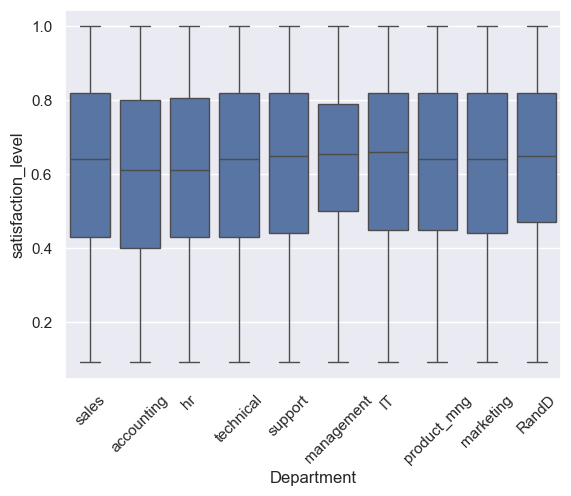

In [111]:
plot1 = sns.boxplot(data=df, x="Department", y="satisfaction_level", )
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)

4. Nu tar vi en titt på hur nöjdheten har föreändrats sen sist.

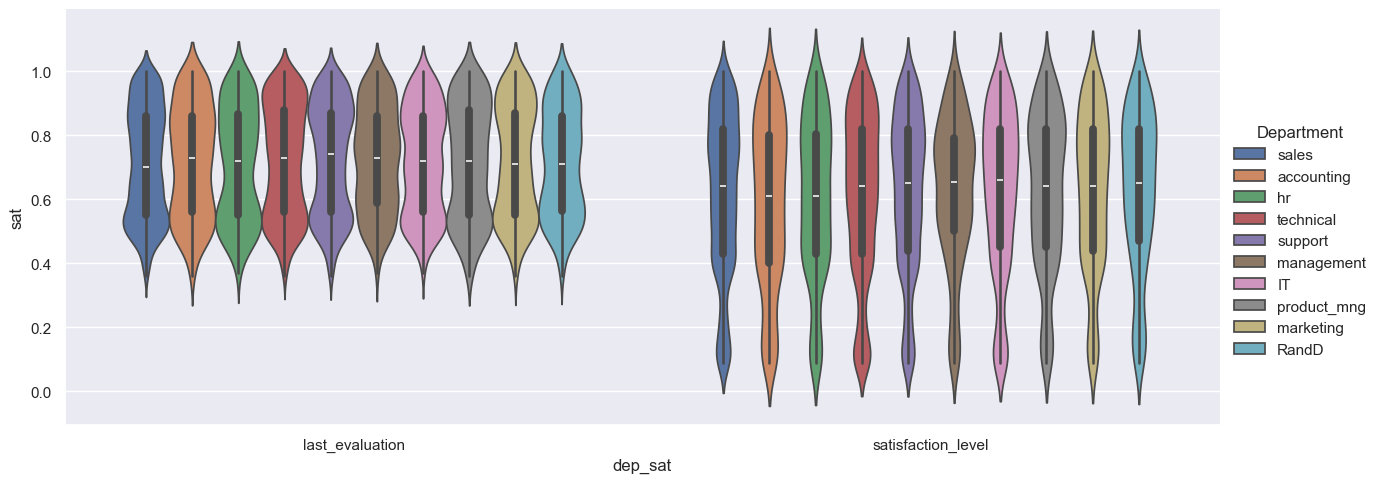

In [112]:
df2 = df.dropna(subset=["last_evaluation"])

melt_df = pd.melt(df2, id_vars="Department", value_vars=["last_evaluation", "satisfaction_level"], var_name="dep_sat", value_name="sat")

sns.catplot(data=melt_df, kind="violin", x="dep_sat", y="sat", hue="Department", height=5, aspect=2.5)

<Axes: xlabel='dep_sat', ylabel='sat'>

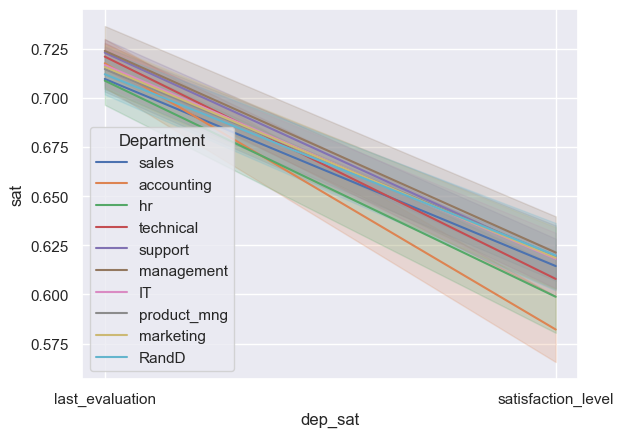

In [113]:
sns.lineplot(data=melt_df, x="dep_sat", y="sat", hue="Department")

In [114]:
print(len(df2[df2["satisfaction_level"] < 0.4]))

2915


In [115]:
print(len(df2[df2["last_evaluation"] < 0.4]))

179


In [116]:
print(len(df2[(df2["last_evaluation"] < 0.4) & (df2["satisfaction_level"] < 0.4)]))

54


Vi kan här se att vi se att det är 2915 anställda som är missnöjda (minder än 0.4 i satisfaction_level) jämfört med 179 på förra utvärderingen. Vi ser dock att endast 54 avd de som tidigare va med i denna listan är kvar.
Vi ser även att vi har en märkbar negativ trend.

5. Här kollar vi hur de anställdas lön påverkar hur nöjda de är.

<Axes: xlabel='salary', ylabel='satisfaction_level'>

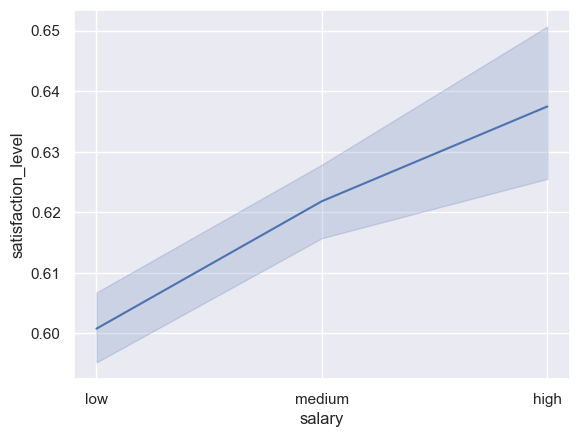

In [117]:
sns.lineplot(data=df, x="salary", y="satisfaction_level")

Vi ser att det finns en korrelation mellan lön och "nöjdhet"

6. Nu kollar vi på om det finns någon korrelation mellan hur länge de anställda varit hos oss och hur nöjda det är,

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

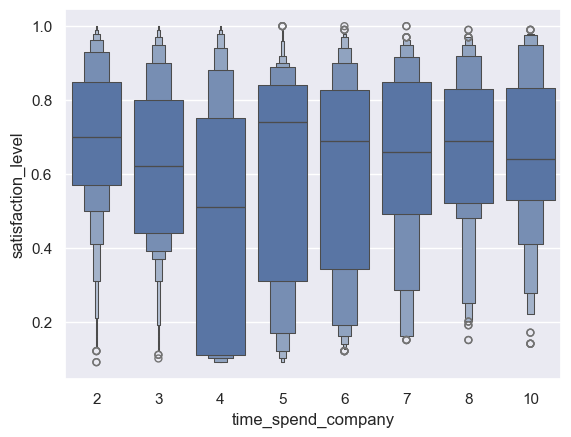

In [118]:
sns.boxenplot(data=df, x="time_spend_company", y="satisfaction_level")

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

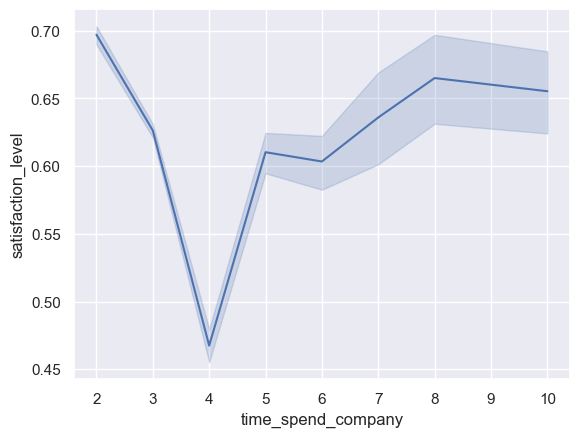

In [119]:
sns.lineplot(data=df, x="time_spend_company", y="satisfaction_level")

<Axes: xlabel='time_spend_company', ylabel='count'>

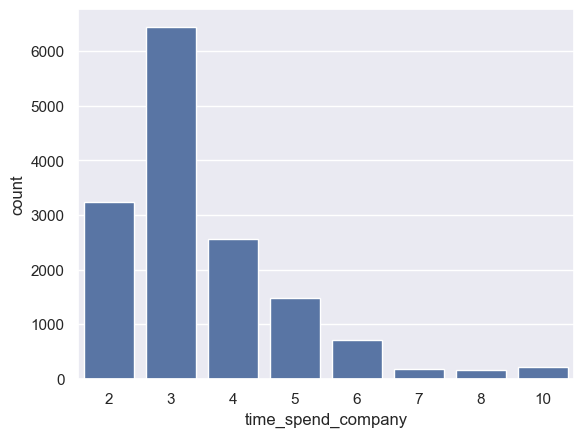

In [120]:
sns.countplot(df, x="time_spend_company")

Vi kan se att vi har mest missnöjda anställda bland de som har jobbat 4 år hos oss och att de flesta anställda har jobba hos oss i 3 år.

7. Till sist tar vi en titt på hur om det finns något samband mellan hur mycket de anställda arbetar och hur nöjda de är

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

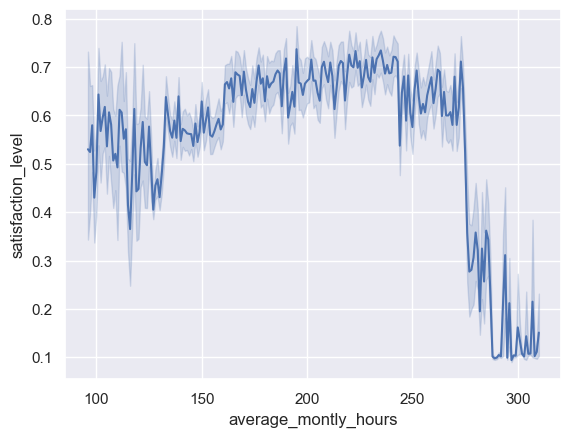

In [121]:
sns.lineplot(data=df, x="average_montly_hours", y="satisfaction_level")

In [122]:
print(len(df[df["average_montly_hours"] > 270]))

1163


Här ser vi tydligt att de anställda som jobbar mer än 270 timmar ligger mycket låg på satisfaction_level.